In [1]:
import pandas as pd
import plotly.express as px

In [2]:
sharks = pd.read_csv('sharks.csv')

In [3]:
sharks

,IncidentNum,Date,County,Location,Mode,Injury,InjuryT,Depth,Species,Comment,Longitude,Latitude,Confirmed Source
0,1,10-08-1950,San Diego,Imperial Beach,Swimming,major,Non-fatal Injury,surface,White,"Body Surfing, bit multiple times on leg, thigh...",-117.146667,32.588333,Lea/Mccosker
1,2,05-27-1952,San Diego,Imperial Beach,Swimming,minor,Non-fatal Injury,surface,White,Foot & swim fin bitten,-117.246667,32.588333,GSAF - with photos
2,3,12-07-1952,Monterey,"Pacific Grove, Lover’s Point",Swimming,fatal,Fatality,surface,White,Attacked from below then second time from fron...,-122.050000,36.626667,Lea/Mccosker
3,4,02-06-1955,Monterey,Pacific Grove,Freediving,minor,Non-fatal Injury,surface,White,"Attacked from behind, lost swim fin",-122.150000,36.626667,Lea/Mccosker
4,5,08-14-1956,San Luis Obispo,Pismo Beach,Swimming,major,Non-fatal Injury,surface,White,Large (9 ft) shark attacked side and hands in ...,-120.646667,35.138333,Lea/Mccosker
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,201,22-07-2021,Monterey,Moss Landing Jetty,Surfing / Boarding,none,No Injury,surface,Unknown,Surfer was paddling and felt something hit his...,-121.791700,36.807600,"Personal account by phone to CDFW staff, follo..."
198,202,03-10-2021,Sonoma,Salmon Creek Beach,Surfing / Boarding,major,Non-fatal Injury,surface,White,White shark bit surfer on leg/thigh with major...,-123.776667,38.358333,"CDFW Wardens, media reports"
199,203,22-12-2021,Sonoma,Salmon Creek Beach,Surfing / Boarding,none,No Injury,surface,White,"Surfer saw 10'-12' shark which then ""charged"" ...",-123.876667,38.358333,State parks incident form with first person ac...
200,204,24-12-2021,San Luis Obispo,Morro Strand State Beach,Surfing / Boarding,fatal,Fatality,surface,White,Surfer found victim face down in water. Signfi...,-121.175000,35.403333,"CDFW Wardens, media reports"


In [4]:
sharks.shape

(202, 13)

In [5]:
sharks.value_counts('Species',normalize=True)
#nearly 90% are from White Sharks

Species
White         0.876238
Unknown       0.069307
Hammerhead    0.014851
Blue          0.009901
Leopard       0.009901
Salmon        0.004950
Sevengill     0.004950
Thresher      0.004950
white         0.004950
Name: proportion, dtype: float64

In [6]:
fatal = sharks.loc[sharks['Injury']== 'fatal']

In [7]:
mode_fatal =fatal.value_counts('Mode')
mode_perc = fatal.value_counts('Mode',normalize=True)

In [8]:
mode_perc

Mode
Surfing / Boarding     0.333333
Swimming               0.333333
Freediving             0.200000
Hookah Diving          0.066667
Kayaking / Canoeing    0.066667
Name: proportion, dtype: float64

In [9]:
#which county (if any) account for the most fatal attacks?
all_fatal = fatal.value_counts('County')
county_fatal = fatal.value_counts('County').index[0]
fatal_num = fatal.value_counts('County')[0]

print(f"The county {county_fatal} accounts for the most fatal shark attacks with a total of {fatal_num}.")
print(f"Out of a total of {len(all_fatal)} counties, {county_fatal} accounts for {fatal_num/sum(all_fatal)*100}% of the fatality cases.")

The county San Luis Obispo accounts for the most fatal shark attacks with a total of 3.
Out of a total of 10 counties, San Luis Obispo accounts for 20.0% of the fatality cases.


In [10]:
# White are the only sharks responsible for fatalities
fatal['Species']

2      White
5      White
7      White
8      White
42     White
47     White
59     White
79     White
96     White
99     White
123    White
135    White
146    White
188    White
200    White
Name: Species, dtype: object

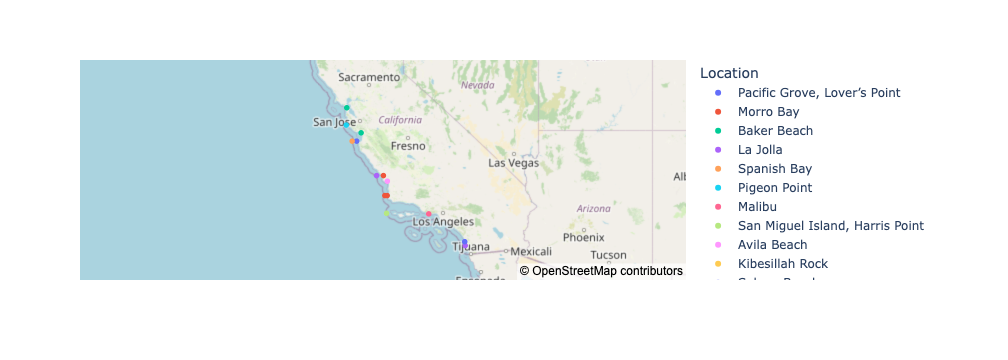

In [12]:
#scatter plot showing the location for shark fatalities
fatal_loc = px.scatter_mapbox(fatal, lat = 'Latitude', lon = 'Longitude',color ='Location',
                             zoom=4,hover_data={'Latitude':False,'Longitude':False})
fatal_loc.update_layout(mapbox_style="open-street-map")

fatal_loc.show()

In [13]:
#Maybe we can look at attacks that occured when mode = 'Swimming'

In [14]:
swim = sharks.loc[sharks['Mode']=='Swimming']

In [15]:
swim

,IncidentNum,Date,County,Location,Mode,Injury,InjuryT,Depth,Species,Comment,Longitude,Latitude,Confirmed Source
0,1,10-08-1950,San Diego,Imperial Beach,Swimming,major,Non-fatal Injury,surface,White,"Body Surfing, bit multiple times on leg, thigh...",-117.146667,32.588333,Lea/Mccosker
1,2,05-27-1952,San Diego,Imperial Beach,Swimming,minor,Non-fatal Injury,surface,White,Foot & swim fin bitten,-117.246667,32.588333,GSAF - with photos
2,3,12-07-1952,Monterey,"Pacific Grove, Lover’s Point",Swimming,fatal,Fatality,surface,White,Attacked from below then second time from fron...,-122.050000,36.626667,Lea/Mccosker
4,5,08-14-1956,San Luis Obispo,Pismo Beach,Swimming,major,Non-fatal Injury,surface,White,Large (9 ft) shark attacked side and hands in ...,-120.646667,35.138333,Lea/Mccosker
5,6,04-28-1957,San Luis Obispo,Morro Bay,Swimming,fatal,Fatality,surface,White,First hand accounts suggest a large white shar...,-120.875000,35.403333,Lea/Mccosker
6,7,10-12-1958,San Diego,Coronado Strand,Swimming,major,Non-fatal Injury,surface,White,Shark bit swimmer multiple times on leg and torso,-117.216667,32.685000,Lea/Mccosker
7,8,05-07-1959,San Francisco,Baker Beach,Swimming,fatal,Fatality,surface,White,Shark bit swimmer multiple times,-122.483600,37.793600,Lea/Mccosker
13,14,05-19-1960,Santa Cruz,"Santa Cruz, Hidden Beach, Aptos",Swimming,major,Non-fatal Injury,surface,White,"Shark bit swimmer's leg, which was later amput...",-122.095000,36.960000,Lea/Mccosker
15,16,08-20-1961,Sonoma,Salmon Creek Beach,Swimming,major,Non-fatal Injury,surface,White,Shark bit swimmer's groin and leg with major i...,-123.076667,38.358333,Lea/Mccosker
39,42,08-05-1978,Santa Cruz,Pajaro Dunes,Swimming,minor,Non-fatal Injury,surface,Unknown,"Body Surfing / Boarding, about to stand and bi...",-121.810000,36.860000,Lea/Mccosker


In [16]:
#compare fatal v. non fatal injury when the mode is swimming

In [17]:
inj_type = swim.value_counts('InjuryT')

In [18]:
injury_ind = inj_type.index

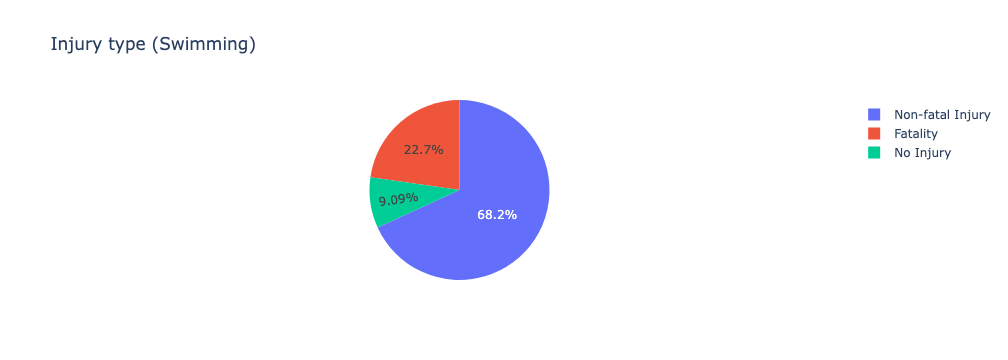

In [19]:
pie = px.pie(values=inj_type, names= injury_ind,title='Injury type (Swimming)')
pie.show()

In [20]:
#After doing that, may as well create a function that will do the same thing for all the modes

In [21]:
def injury_mode(data, mode):
    mode_info = data.loc[data['Mode']==mode]
    inj_type = mode_info.value_counts('InjuryT')
    injury_ind = inj_type.index
    pie = px.pie(values=inj_type, names= injury_ind,title=f'Injury type: {mode}',
                color_discrete_sequence=px.colors.qualitative.Prism)
    return pie.show()

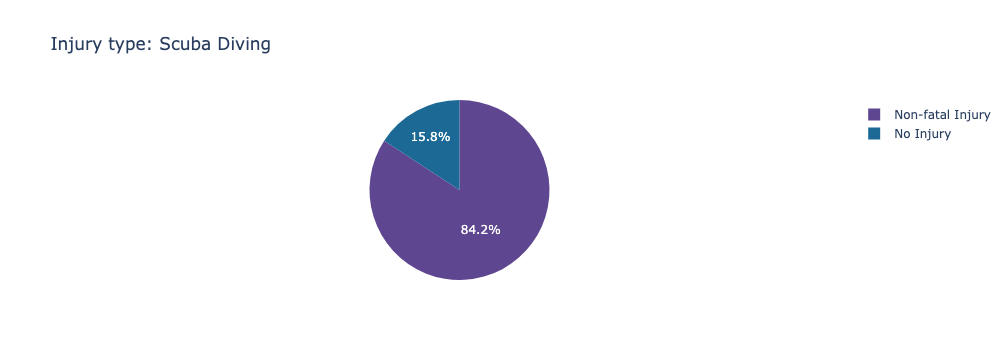

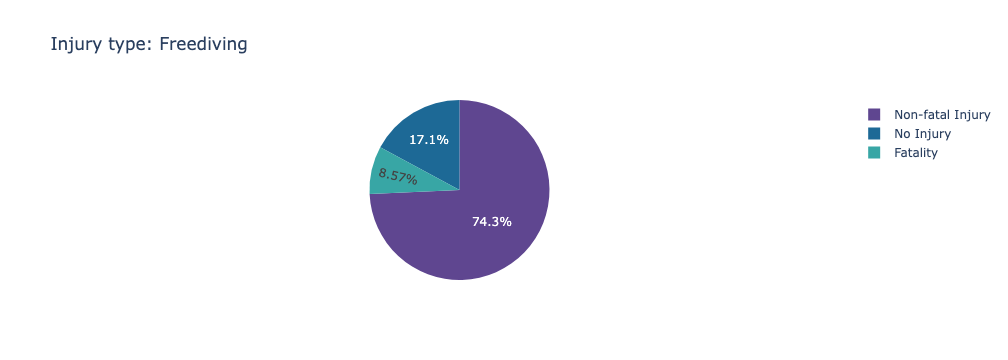

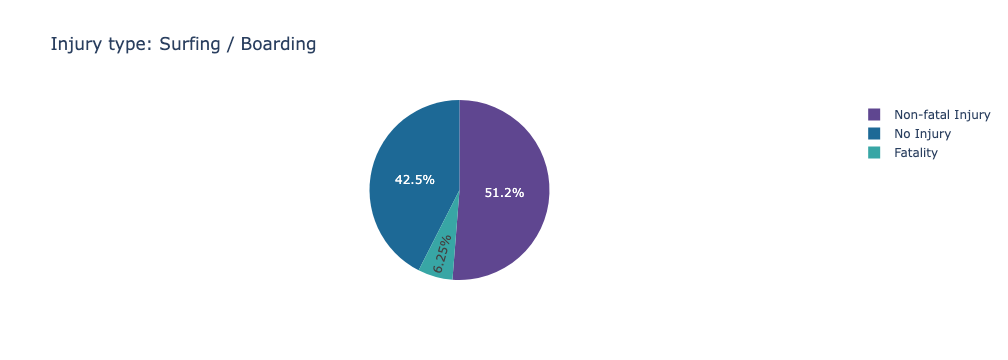

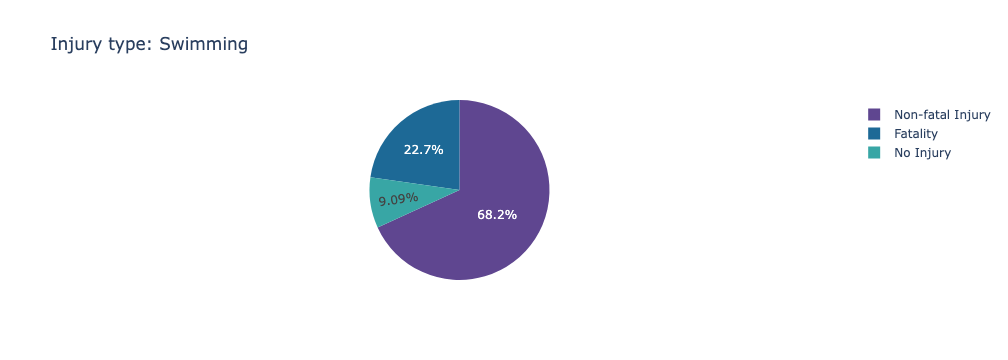

In [22]:
injury_mode(sharks, 'Scuba Diving')
injury_mode(sharks, 'Freediving')
injury_mode(sharks, 'Surfing / Boarding')
injury_mode(sharks, 'Swimming')

In [23]:
import regex as re
#grabbing the year from the date column to see if there are more attacks in a particular year/decade
year = []
look = '(\d{4})'

for i in sharks['Date']:
    #print(re.findall(look, i))
    year.append(''.join(re.findall(look, i)))

In [25]:
sharks['Year'] = year

In [27]:
attack = sharks.value_counts('Year',sort=False) #ascending order

In [28]:
shark_data = pd.DataFrame(columns=['Num_of_Attacks'],index=None)

In [29]:
shark_data['Num_of_Attacks']=attack

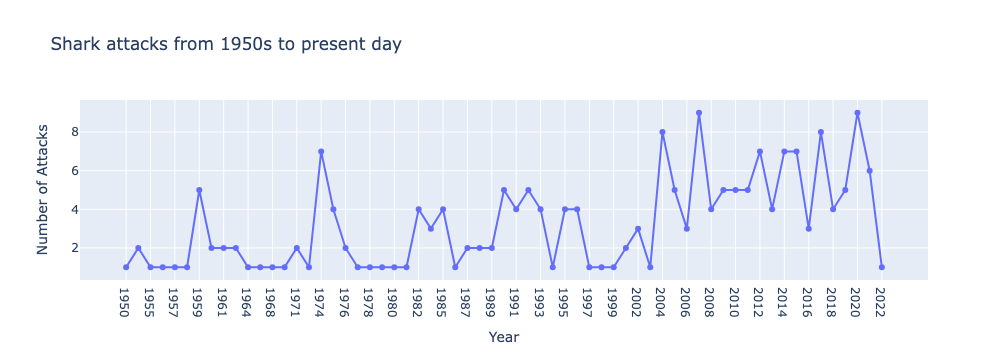

In [30]:
line_attacks = px.line(shark_data, y='Num_of_Attacks',markers=True, title='Shark attacks from 1950s to present day')
line_attacks.update_layout(yaxis_title='Number of Attacks')
line_attacks.show()

In [31]:
#What about county with highest incidence of attacks?

In [32]:
county = sharks.value_counts('County')
county_names = county.index

In [33]:
county_info = pd.DataFrame(columns=['county','county_names'])

In [34]:
county_info['county']=county
county_info['county_names']=county_names

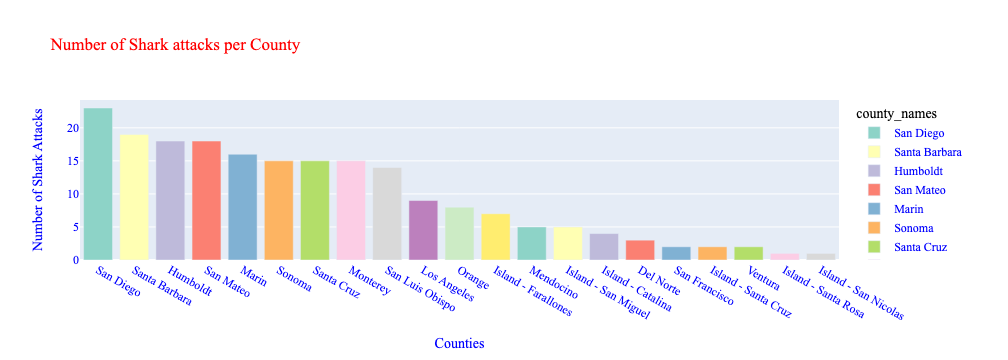

In [35]:
bar_county = px.bar(county_info, x='county_names',y='county',color='county_names',
                   color_discrete_sequence=px.colors.qualitative.Set3,
                   title='Number of Shark attacks per County')

bar_county.update_layout(xaxis_title='Counties', yaxis_title='Number of Shark Attacks',
    
    font_family="Times New Roman",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="black"
)
bar_county.show()

In [36]:
shark_comments = []
for i in sharks.Comment:
    shark_comments.append(i)

In [37]:
shark_comments

['Body Surfing, bit multiple times on leg, thigh and body',
 'Foot & swim fin bitten',
 'Attacked from below then second time from front, fatal',
 'Attacked from behind, lost swim fin',
 'Large (9 ft) shark attacked side and hands in shallow water',
 "First hand accounts suggest a large white shark, bit swimmer's arm, victim never found",
 'Shark bit swimmer multiple times on leg and torso',
 'Shark bit swimmer multiple times',
 'Free diver bit, dragged to bottom and not recovered, eyewitness reports',
 'Hammerhead bit thigh. Diver saw shark during and after attack',
 'Large shark grabbed fin, no injury',
 'Blue shark bit arm and released, minor injuries',
 "Shark bit fin and diver's heel",
 "Shark bit swimmer's leg, which was later amputated below the knee",
 "Shark bit abalone diver's weight belt, no injuries",
 "Shark bit swimmer's groin and leg with major injuries to the foot and other lacerations",
 'Spearfishing free diver bitten severely in Leg',
 'SCUBA diver attacked at surfac

In [38]:
from wordcloud import WordCloud, STOPWORDS
import PIL
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [39]:
shark_text = ''.join(shark_comments)

In [40]:
stopwords = set(STOPWORDS)
shark_stop = {'shark','time'}
stopwords.update(shark_stop)
shark_cloud = WordCloud(stopwords=stopwords,background_color="#e5e5e5")
cloud = shark_cloud.generate(shark_text)

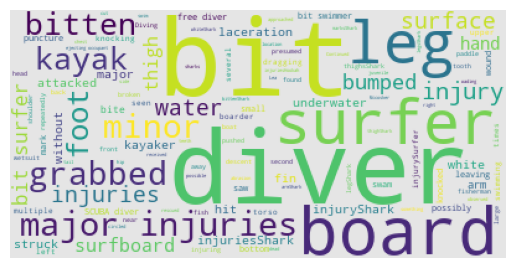

In [41]:
plt.imshow(cloud)
plt.axis("off")
plt.show()

In [42]:
shark_mask = np.array(Image.open("shark.png"))
#all zeroes

In [43]:
shark_mask[shark_mask == 0] = 255

In [44]:
shark_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

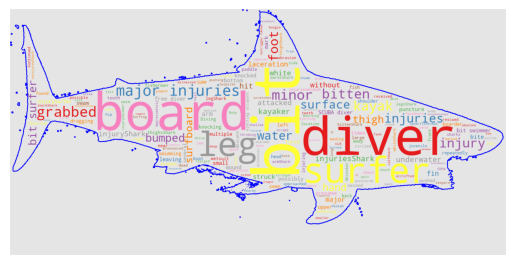

In [45]:
shark_cloud = WordCloud(stopwords=stopwords,mask=shark_mask, contour_color= 'blue',contour_width=2,
                        colormap= 'Set1',background_color="#e5e5e5")
cloud = shark_cloud.generate(shark_text)
plt.imshow(cloud)
plt.axis("off")
plt.show()